In [1]:
import bootcampviztools as bt
from toolbox_ML import describe_df, tipifica_variables, get_features_num_regression, plot_features_num_regression, get_features_cat_regression, plot_features_cat_regression
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split

pd.options.mode.copy_on_write = True

### Problema de negocio
- Se busca predecir qué productos generaran beneficios y cuáles generan perdidas

### Importar datos

In [2]:
df = pd.read_csv("../data_sample/Superstore.csv", encoding="latin1")
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


### Creación del target

In [3]:
def clasificar_profit(x):
    if x > 0:
        return 1 # -> beneficio
    else:
        return 0 # -> pérdida 

df["Profit_Class"] = df["Profit"].apply(clasificar_profit)

In [4]:
df = df.drop(columns=["Profit"])

In [5]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit_Class
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,1
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,1
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,1
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,0
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

### Dividir X_train, X_test, y_train, y_test

In [7]:
X = df.drop(["Profit_Class"], axis=1)
y = df["Profit_Class"].copy()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42, stratify=y)

In [9]:
X_train.shape

(7995, 20)

In [10]:
X_test.shape

(1999, 20)

In [11]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7995 entries, 2667 to 4099
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         7995 non-null   int64  
 1   Order ID       7995 non-null   object 
 2   Order Date     7995 non-null   object 
 3   Ship Date      7995 non-null   object 
 4   Ship Mode      7995 non-null   object 
 5   Customer ID    7995 non-null   object 
 6   Customer Name  7995 non-null   object 
 7   Segment        7995 non-null   object 
 8   Country        7995 non-null   object 
 9   City           7995 non-null   object 
 10  State          7995 non-null   object 
 11  Postal Code    7995 non-null   int64  
 12  Region         7995 non-null   object 
 13  Product ID     7995 non-null   object 
 14  Category       7995 non-null   object 
 15  Sub-Category   7995 non-null   object 
 16  Product Name   7995 non-null   object 
 17  Sales          7995 non-null   float64
 18  Quantity  

In [12]:
X_train.describe()

,Row ID,Postal Code,Sales,Quantity,Discount
count,7995.000000,7995.000000,7995.000000,7995.000000,7995.000000
mean,4975.072545,55239.642777,227.610270,3.789118,0.156306
std,2880.026057,32135.065867,636.220268,2.229413,0.206263
min,1.000000,1040.000000,0.556000,1.000000,0.000000
25%,2488.500000,23223.000000,17.145000,2.000000,0.000000
50%,4972.000000,58103.000000,54.816000,3.000000,0.200000
75%,7446.500000,90008.000000,207.000000,5.000000,0.200000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000


### Procesado de datos

#### Distribución del target

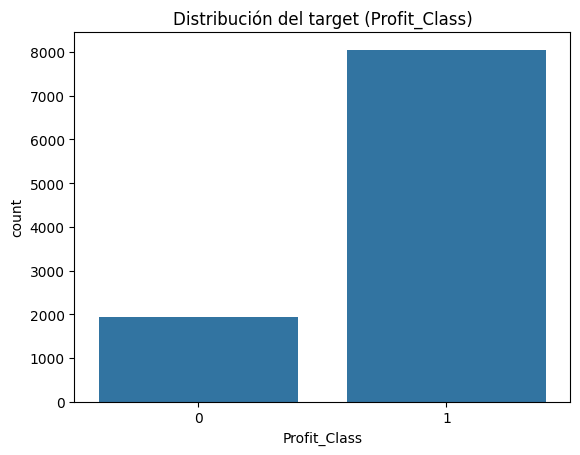

In [13]:
sns.countplot(data=df, x="Profit_Class")
plt.title("Distribución del target (Profit_Class)")
plt.show()

#### Transformación de variables

In [14]:
describe_df(X_train)

,DATA_TYPE,MISSINGS (%),UNIQUE_VALUES,CARDIN (%)
Row ID,int64,0.0,7995,100.00
Sales,float64,0.0,5023,62.83
Order ID,object,0.0,4450,55.66
Product ID,object,0.0,1830,22.89
Product Name,object,0.0,1818,22.74
Ship Date,object,0.0,1303,16.30
Order Date,object,0.0,1210,15.13
Customer ID,object,0.0,791,9.89
Customer Name,object,0.0,791,9.89
Postal Code,int64,0.0,611,7.64


##### Eliminamos variables con alta cardinalidad o que no le aporten información al modelo

In [15]:
cols_to_drop = ["Row ID", "Order ID", "Product ID","Customer ID", "Postal Code", "Customer Name", "Country"]
X_train = X_train.drop(columns=cols_to_drop, errors="ignore") # -> sirve para evitar que si una columna no esta presente en el otro set no nos de error
X_test = X_test.drop(columns=cols_to_drop, errors="ignore")

In [16]:
X_train.head()

,Order Date,Ship Date,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount
2667,10/1/2016,10/1/2016,Same Day,Consumer,Amarillo,Texas,Central,Office Supplies,Paper,Easy-staple paper,28.352,1,0.2
4055,9/29/2014,10/3/2014,Standard Class,Corporate,Philadelphia,Pennsylvania,East,Office Supplies,Storage,Tennsco Single-Tier Lockers,1801.632,6,0.2
8533,11/30/2016,12/6/2016,Standard Class,Consumer,Detroit,Michigan,Central,Furniture,Chairs,High-Back Leather Manager's Chair,389.970,3,0.0
224,12/24/2015,12/27/2015,First Class,Consumer,Dublin,Ohio,East,Office Supplies,Art,Stanley Bostitch Contemporary Electric Pencil ...,27.168,2,0.2
847,10/13/2015,10/17/2015,Standard Class,Consumer,Louisville,Kentucky,South,Furniture,Chairs,Global Deluxe Office Fabric Chairs,287.940,3,0.0


In [17]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7995 entries, 2667 to 4099
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order Date    7995 non-null   object 
 1   Ship Date     7995 non-null   object 
 2   Ship Mode     7995 non-null   object 
 3   Segment       7995 non-null   object 
 4   City          7995 non-null   object 
 5   State         7995 non-null   object 
 6   Region        7995 non-null   object 
 7   Category      7995 non-null   object 
 8   Sub-Category  7995 non-null   object 
 9   Product Name  7995 non-null   object 
 10  Sales         7995 non-null   float64
 11  Quantity      7995 non-null   int64  
 12  Discount      7995 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 874.5+ KB


- Order date y Ship Date

In [18]:
X_train["Order Date"] = pd.to_datetime(X_train["Order Date"])
X_test["Order Date"] = pd.to_datetime(X_test["Order Date"])

X_train["Ship Date"] = pd.to_datetime(X_train["Ship Date"])
X_test["Ship Date"] = pd.to_datetime(X_test["Ship Date"])

In [19]:
X_train["Order_Year"] = X_train["Order Date"].dt.year
X_train["Order_Month"] = X_train["Order Date"].dt.month
X_train["Order_Day"] = X_train["Order Date"].dt.day

X_test["Order_Year"] = X_test["Order Date"].dt.year
X_test["Order_Month"] = X_test["Order Date"].dt.month
X_test["Order_Day"] = X_test["Order Date"].dt.day

In [20]:
X_train["Ship_Year"] = X_train["Ship Date"].dt.year
X_train["Ship_Month"] = X_train["Ship Date"].dt.month
X_train["Ship_Day"] = X_train["Ship Date"].dt.day

X_test["Ship_Year"] = X_test["Ship Date"].dt.year
X_test["Ship_Month"] = X_test["Ship Date"].dt.month
X_test["Ship_Day"] = X_test["Ship Date"].dt.day

- Con la información que tenemos podemos crear la columna delivery_days

In [21]:
X_train["delivery_days"] = (X_train["Ship Date"] - X_train["Order Date"]).dt.days
X_test["delivery_days"] = (X_test["Ship Date"] - X_test["Order Date"]).dt.days

In [22]:
X_train = X_train.drop(columns=["Order Date", "Ship Date"], errors="ignore") 
X_test = X_test.drop(columns=["Order Date", "Ship Date"], errors="ignore")

- Podemos crear una columna que se llame impacto de vnetas por retraso para medir el riesgo financiero, ya que un retraso de entrega castiga mucho más al beneficio de un producto caro (Sales alto) que al de uno barato.

In [23]:
X_train['impact_sales_delay'] = X_train['Sales'] * X_train['delivery_days']
X_test['impact_sales_delay'] = X_test['Sales'] * X_test['delivery_days']

In [24]:
X_train.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Order_Year,Order_Month,Order_Day,Ship_Year,Ship_Month,Ship_Day,delivery_days,impact_sales_delay
2667,Same Day,Consumer,Amarillo,Texas,Central,Office Supplies,Paper,Easy-staple paper,28.352,1,0.2,2016,10,1,2016,10,1,0,0.000
4055,Standard Class,Corporate,Philadelphia,Pennsylvania,East,Office Supplies,Storage,Tennsco Single-Tier Lockers,1801.632,6,0.2,2014,9,29,2014,10,3,4,7206.528
8533,Standard Class,Consumer,Detroit,Michigan,Central,Furniture,Chairs,High-Back Leather Manager's Chair,389.970,3,0.0,2016,11,30,2016,12,6,6,2339.820
224,First Class,Consumer,Dublin,Ohio,East,Office Supplies,Art,Stanley Bostitch Contemporary Electric Pencil ...,27.168,2,0.2,2015,12,24,2015,12,27,3,81.504
847,Standard Class,Consumer,Louisville,Kentucky,South,Furniture,Chairs,Global Deluxe Office Fabric Chairs,287.940,3,0.0,2015,10,13,2015,10,17,4,1151.760


- Ship Mode -> aplicar get dummies

In [25]:
X_train["Ship Mode"].value_counts()

Ship Mode
Standard Class    4754
Second Class      1564
First Class       1243
Same Day           434
Name: count, dtype: int64

- Segment -> aplicar get dummies

In [26]:
X_train["Segment"].value_counts()

Segment
Consumer       4125
Corporate      2433
Home Office    1437
Name: count, dtype: int64

- City, State 

In [27]:
X_train["City"].value_counts()

City
New York City      737
Los Angeles        598
Philadelphia       423
San Francisco      418
Seattle            331
                  ... 
North Miami          1
San Luis Obispo      1
Murrieta             1
Champaign            1
Billings             1
Name: count, Length: 516, dtype: int64

In [28]:
X_train["State"].value_counts()

State
California              1622
New York                 904
Texas                    788
Pennsylvania             461
Washington               393
Illinois                 391
Ohio                     372
Florida                  306
Michigan                 202
North Carolina           191
Arizona                  182
Virginia                 178
Tennessee                152
Colorado                 151
Georgia                  144
Kentucky                 116
Indiana                  115
Massachusetts            112
New Jersey               106
Oregon                    99
Maryland                  86
Wisconsin                 80
Delaware                  72
Minnesota                 68
Connecticut               66
Oklahoma                  54
Alabama                   53
Rhode Island              51
Arkansas                  48
Missouri                  47
Utah                      45
Mississippi               43
Nevada                    34
Louisiana                 34
Nebraska

In [29]:
counts = df["State"].value_counts()
rare_states = counts[counts <= 3].index

In [30]:
X_train["State_grouped"] = X_train["State"].replace(rare_states, "Other")
X_test["State_grouped"] = X_test["State"].replace(rare_states, "Other")

In [31]:
X_train = X_train.drop(columns=["State"], errors="ignore") 
X_test = X_test.drop(columns=["State"], errors="ignore")

Eliminamos City y nos quedamos con State porque City tiene demasiadas categorías y aporta mucho ruido, mientras que State resume la información geográfica de forma estable y útil para el modelo

In [32]:
X_train = X_train.drop(columns=["City"], errors="ignore") 
X_test = X_test.drop(columns=["City"], errors="ignore")

- Region -> aplicar get dummies

- Product Name

In [33]:
X_train["Product Name"].value_counts()

Product Name
Easy-staple paper                                                            37
Staples                                                                      36
Staple envelope                                                              35
KI Adjustable-Height Table                                                   16
Staples in misc. colors                                                      15
                                                                             ..
Xerox 1980                                                                    1
Okidata MB760 Printer                                                         1
Hewlett-Packard Deskjet 6540 Color Inkjet Printer                             1
Belkin 7 Outlet SurgeMaster Surge Protector with Phone Protection             1
Snap-A-Way Black Print Carbonless Speed Message, No Reply Area, Duplicate     1
Name: count, Length: 1818, dtype: int64

In [34]:
import category_encoders as ce

# Crear el encoder
te_product = ce.TargetEncoder(cols=["Product Name"])

# Ajustar SOLO con train
te_product.fit(X_train["Product Name"], y_train)

# Transformar
X_train["ProductName_TE"] = te_product.transform(X_train["Product Name"])
X_test["ProductName_TE"] = te_product.transform(X_test["Product Name"])

# Eliminar la original
X_train = X_train.drop(columns=["Product Name"])
X_test = X_test.drop(columns=["Product Name"])

Target Encoding convierte cada producto en un número que representa su tendencia real a generar pérdidas o beneficios.

In [35]:
X_train.sample(10)

,Ship Mode,Segment,Region,Category,Sub-Category,Sales,Quantity,Discount,Order_Year,Order_Month,Order_Day,Ship_Year,Ship_Month,Ship_Day,delivery_days,impact_sales_delay,State_grouped,ProductName_TE
1161,Second Class,Consumer,West,Office Supplies,Art,53.940,3,0.0,2014,9,1,2014,9,5,4,215.760,California,0.841598
8615,Standard Class,Consumer,West,Office Supplies,Binders,14.256,3,0.2,2016,9,10,2016,9,14,4,57.024,Washington,0.711307
7589,Standard Class,Consumer,Central,Office Supplies,Art,128.744,7,0.2,2015,9,25,2015,9,29,4,514.976,Illinois,0.841598
8930,Standard Class,Consumer,Central,Technology,Phones,239.976,3,0.2,2015,4,13,2015,4,17,4,959.904,Texas,0.838800
5305,Standard Class,Corporate,East,Furniture,Furnishings,68.950,5,0.0,2016,2,21,2016,2,26,5,344.750,New York,0.836181
6843,Standard Class,Corporate,South,Office Supplies,Storage,67.900,5,0.0,2016,9,12,2016,9,17,5,339.500,Virginia,0.811611
3225,First Class,Corporate,West,Office Supplies,Envelopes,12.768,6,0.2,2014,10,2,2014,10,5,3,38.304,Arizona,0.836181
1759,Standard Class,Consumer,East,Office Supplies,Art,19.536,3,0.2,2014,1,5,2014,1,12,7,136.752,Pennsylvania,0.838800
5214,Same Day,Consumer,West,Office Supplies,Art,35.400,5,0.0,2016,9,26,2016,9,26,0,0.000,California,0.847748
8481,Standard Class,Home Office,East,Office Supplies,Art,16.656,3,0.2,2016,5,24,2016,5,28,4,66.624,Pennsylvania,0.844580


In [36]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7995 entries, 2667 to 4099
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Ship Mode           7995 non-null   object 
 1   Segment             7995 non-null   object 
 2   Region              7995 non-null   object 
 3   Category            7995 non-null   object 
 4   Sub-Category        7995 non-null   object 
 5   Sales               7995 non-null   float64
 6   Quantity            7995 non-null   int64  
 7   Discount            7995 non-null   float64
 8   Order_Year          7995 non-null   int32  
 9   Order_Month         7995 non-null   int32  
 10  Order_Day           7995 non-null   int32  
 11  Ship_Year           7995 non-null   int32  
 12  Ship_Month          7995 non-null   int32  
 13  Ship_Day            7995 non-null   int32  
 14  delivery_days       7995 non-null   int64  
 15  impact_sales_delay  7995 non-null   float64
 16  State_gr

In [37]:
X_train.describe()

,Sales,Quantity,Discount,Order_Year,Order_Month,Order_Day,Ship_Year,Ship_Month,Ship_Day,delivery_days,impact_sales_delay,ProductName_TE
count,7995.000000,7995.000000,7995.000000,7995.000000,7995.000000,7995.000000,7995.000000,7995.000000,7995.000000,7995.000000,7995.000000,7995.000000
mean,227.610270,3.789118,0.156306,2015.725078,7.828643,15.455535,2015.739712,7.768730,15.876798,3.956098,889.212352,0.806681
std,636.220268,2.229413,0.206263,1.123014,3.273025,8.764501,1.125552,3.327984,8.803214,1.748282,2903.317053,0.054828
min,0.556000,1.000000,0.000000,2014.000000,1.000000,1.000000,2014.000000,1.000000,1.000000,0.000000,0.000000,0.604900
25%,17.145000,2.000000,0.000000,2015.000000,5.000000,8.000000,2015.000000,5.000000,8.000000,3.000000,53.890000,0.778641
50%,54.816000,3.000000,0.200000,2016.000000,9.000000,15.000000,2016.000000,9.000000,16.000000,4.000000,189.700000,0.833737
75%,207.000000,5.000000,0.200000,2017.000000,11.000000,23.000000,2017.000000,11.000000,24.000000,5.000000,738.912000,0.841598
max,22638.480000,14.000000,0.800000,2017.000000,12.000000,31.000000,2018.000000,12.000000,31.000000,7.000000,122499.650000,0.970073


In [38]:
features_num = X_train.select_dtypes(include=["int64", "int32","float64"]).columns.tolist()
features_cat = X_train.select_dtypes(include=["object"]).columns.tolist()

features_num, features_cat

(['Sales',
  'Quantity',
  'Discount',
  'Order_Year',
  'Order_Month',
  'Order_Day',
  'Ship_Year',
  'Ship_Month',
  'Ship_Day',
  'delivery_days',
  'impact_sales_delay',
  'ProductName_TE'],
 ['Ship Mode',
  'Segment',
  'Region',
  'Category',
  'Sub-Category',
  'State_grouped'])

### Mini- EDA

Analizar el conjunto de entrenamiento con el objetivo de identificar patrones relevantes para la predicción de la rentabilidad (Profit_Class).

El análisis se realiza exclusivamente sobre el conjunto de entrenamiento.

 ##### Distribución del Target

In [39]:

print(y_train.value_counts())


print(y_train.value_counts(normalize=True))

Profit_Class
1    6446
0    1549
Name: count, dtype: int64
Profit_Class
1    0.806254
0    0.193746
Name: proportion, dtype: float64


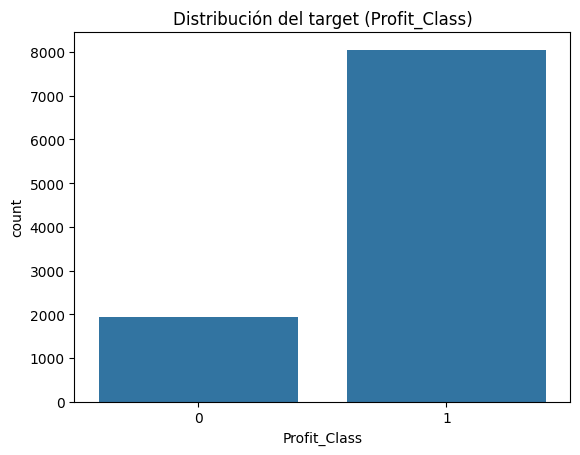

In [40]:
sns.countplot(data=df, x="Profit_Class")
plt.title("Distribución del target (Profit_Class)")
plt.show()

### Conclusión del target

El 80,6% de las ventas son rentables, mientras que el 19,4% generan pérdidas.

Esto indica un desbalance moderado del problema.



## Variables Numéricas

 ##### Análisis de variables numéricas

In [41]:
'''features_num = [
    'Sales',
    'Quantity',
    'Discount',
    'Order_Year',
    'Order_Month',
    'Order_Day',
    'Ship_Year',
    'Ship_Month',
    'Ship_Day',
    'ProductName_TE'
]'''

"features_num = [\n    'Sales',\n    'Quantity',\n    'Discount',\n    'Order_Year',\n    'Order_Month',\n    'Order_Day',\n    'Ship_Year',\n    'Ship_Month',\n    'Ship_Day',\n    'ProductName_TE'\n]"

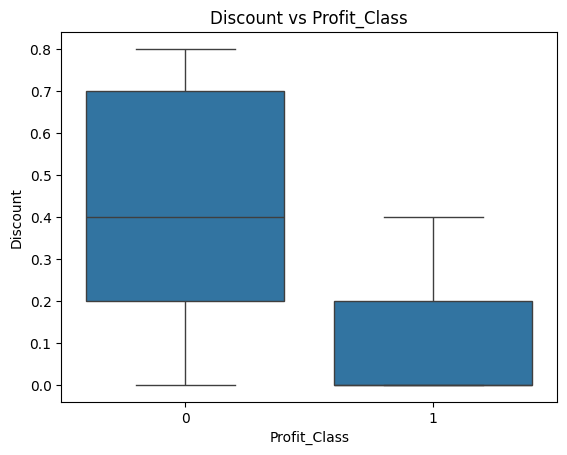

In [42]:
sns.boxplot(x=y_train, y=X_train["Discount"])
plt.title("Discount vs Profit_Class")
plt.show()

### Conclusión Discount
##### Discount vs Rentabilidad

Se observa una diferencia clara entre ambas clases.

Las ventas rentables suelen tener descuentos bajos, mientras que las ventas con pérdidas presentan descuentos significativamente más altos.

Esto indica que el descuento es una variable clave en la generación de pérdidas.


### Sales vs Target

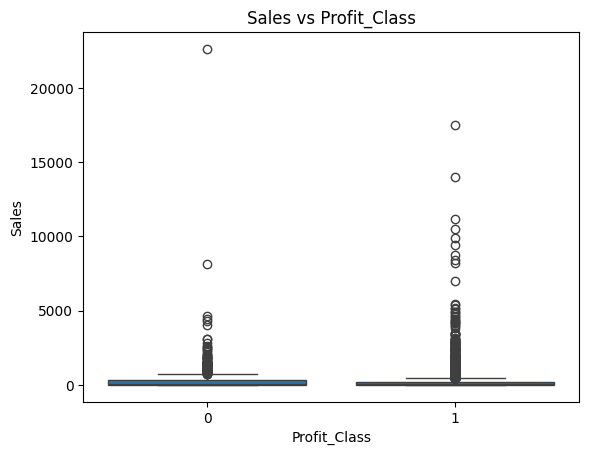

In [43]:
sns.boxplot(x=y_train, y=X_train["Sales"])
plt.title("Sales vs Profit_Class")
plt.show()

### Conclusión Sales 
##### Sales vs Rentabilidad

No se observa una separación clara entre ventas rentables y no rentables en función del volumen de ventas.

Existen muchos valores extremos (outliers), especialmente en ventas altas.


#### Quantity vs Target

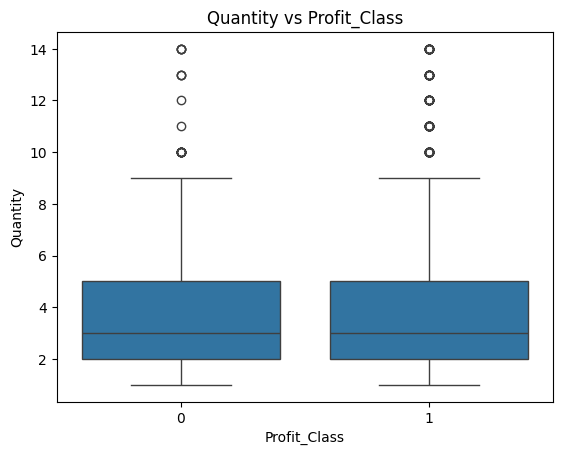

In [44]:
sns.boxplot(x=y_train, y=X_train["Quantity"])
plt.title("Quantity vs Profit_Class")
plt.show()

#### Distribución de Sales

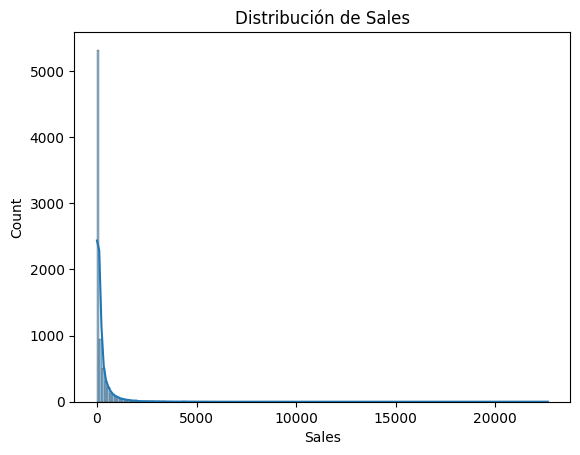

In [45]:
sns.histplot(X_train["Sales"], kde=True)
plt.title("Distribución de Sales")
plt.show()

#### Quantity vs Target

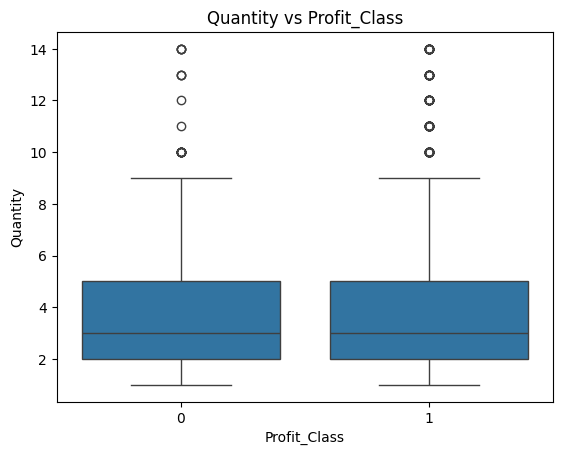

In [46]:
sns.boxplot(x=y_train, y=X_train["Quantity"])
plt.title("Quantity vs Profit_Class")
plt.show()

## Variables Categóricas

#### Category vs Target

In [47]:
pd.crosstab(X_train["Category"], y_train, normalize="index")

Profit_Class,0,1
Category,,
Furniture,0.352625,0.647375
Office Supplies,0.152093,0.847907
Technology,0.150033,0.849967


#### Visualización Category

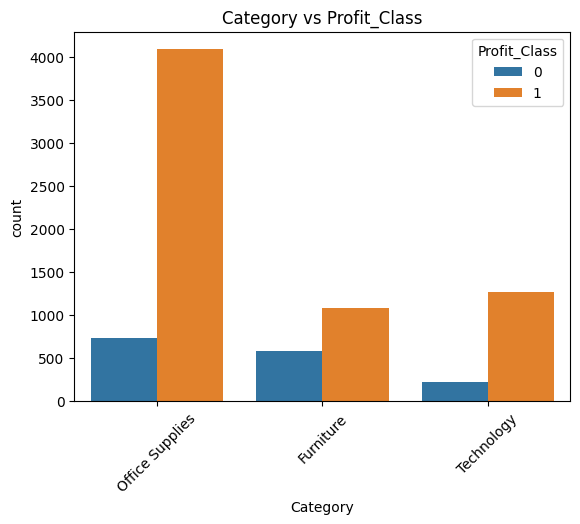

In [48]:
sns.countplot(data=X_train, x="Category", hue=y_train)
plt.xticks(rotation=45)
plt.title("Category vs Profit_Class")
plt.show()

#### Sub-Category vs Target

In [49]:
pd.crosstab(X_train["Sub-Category"], y_train, normalize="index")

Profit_Class,0,1
Sub-Category,,
Accessories,0.114050,0.885950
Appliances,0.137097,0.862903
Art,0.000000,1.000000
Binders,0.404782,0.595218
Bookcases,0.474576,0.525424
Chairs,0.401222,0.598778
Copiers,0.000000,1.000000
Envelopes,0.000000,1.000000
Fasteners,0.080460,0.919540


#### Segment vs Target

In [50]:
pd.crosstab(X_train["Segment"], y_train, normalize="index")

Profit_Class,0,1
Segment,,
Consumer,0.202182,0.797818
Corporate,0.188656,0.811344
Home Office,0.178149,0.821851


#### Region vs Target

In [51]:
pd.crosstab(X_train["Region"], y_train, normalize="index")

Profit_Class,0,1
Region,,
Central,0.325531,0.674469
East,0.202632,0.797368
South,0.166795,0.833205
West,0.105691,0.894309


## Correlación Numérica

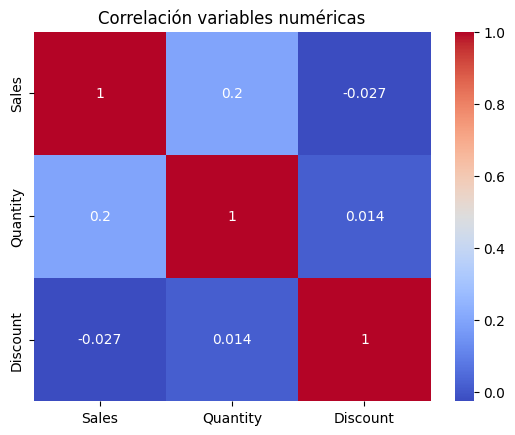

In [52]:
num_cols = ["Sales", "Quantity", "Discount"]
corr = X_train[num_cols].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlación variables numéricas")
plt.show()

## Conclusiones del Mini-EDA

A partir del análisis realizado se concluye:

- Discount es la variable más influyente en la generación de pérdidas.
- Algunas categorías y subcategorías presentan patrones claros de baja rentabilidad.
- La región también influye significativamente.
- Sales presenta fuerte asimetría positiva y se considerará transformación logarítmica.
- No existen problemas importantes de multicolinealidad.

Estas conclusiones guiarán el diseño del pipeline de preprocesado y la selección de modelos.

### Mini-EDA 2

##### Features categóricas

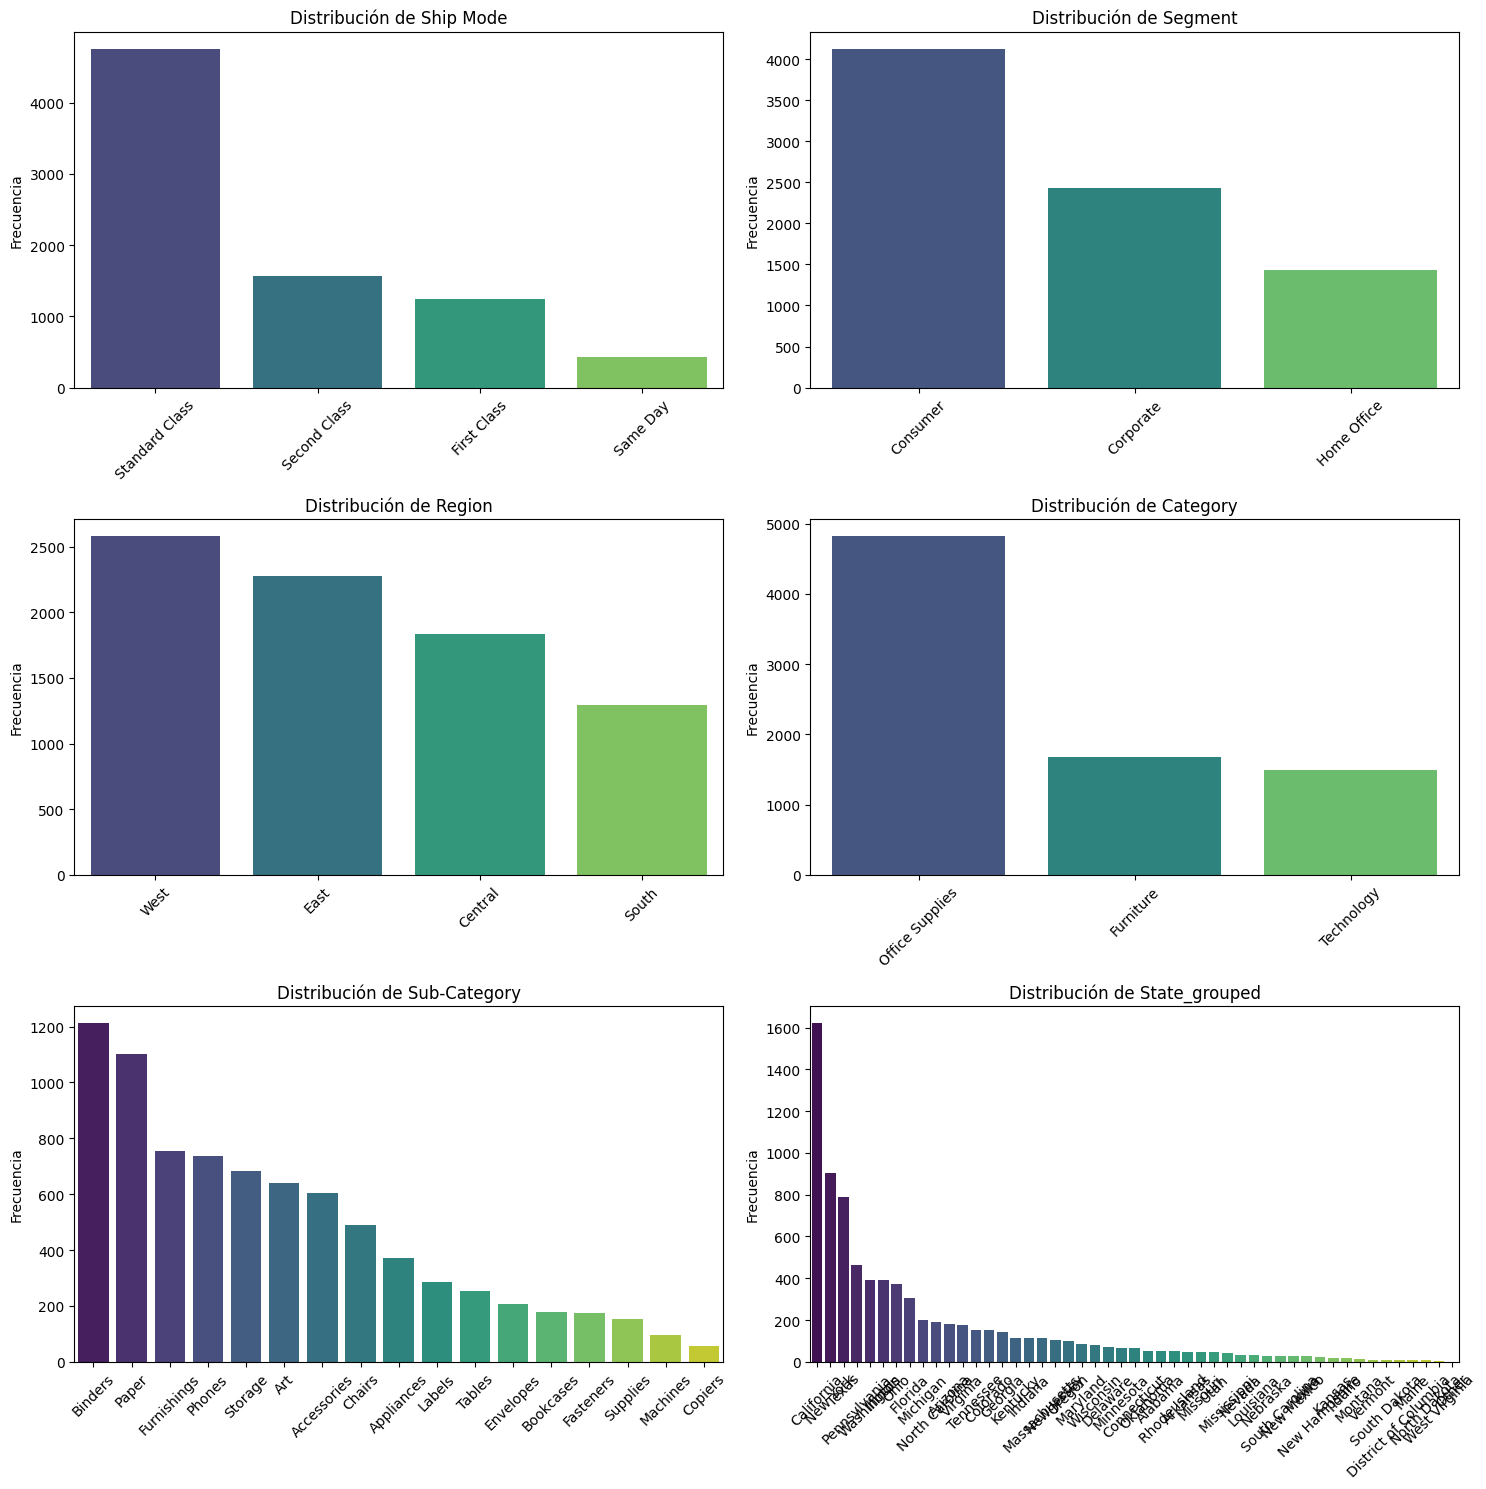

In [53]:
bt.pinta_distribucion_categoricas(X_train, features_cat, relativa=False, mostrar_valores=False)

##### Features numéricas

In [54]:
target = "Profit_Class"

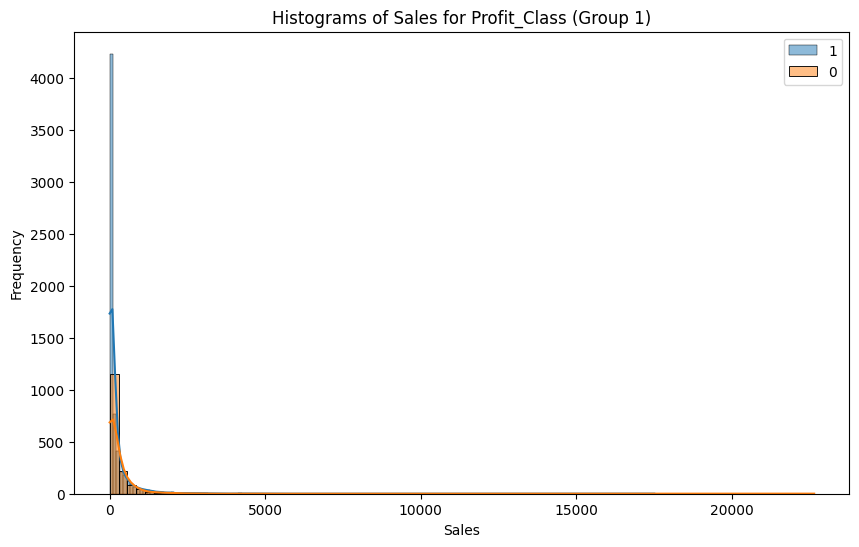

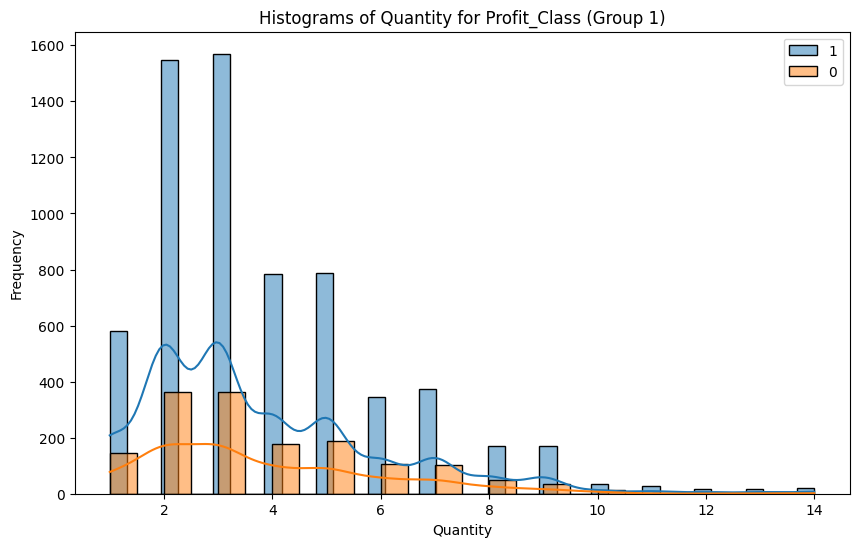

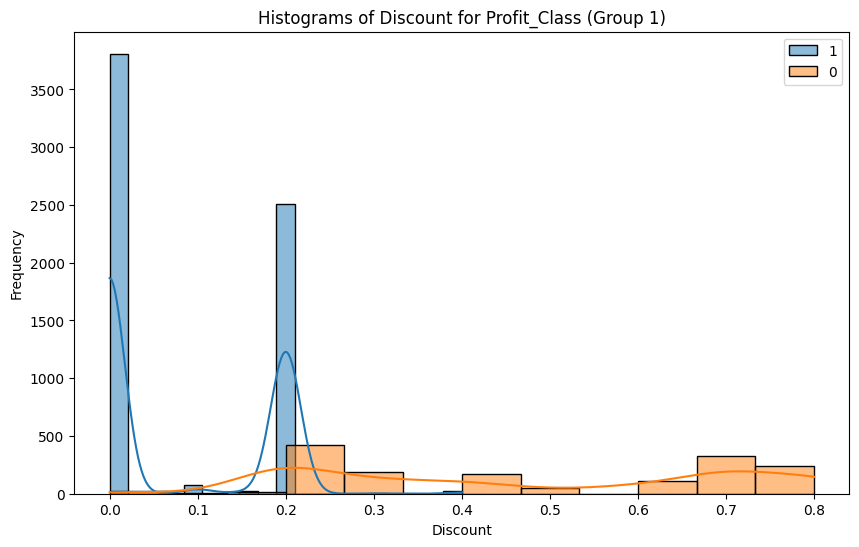

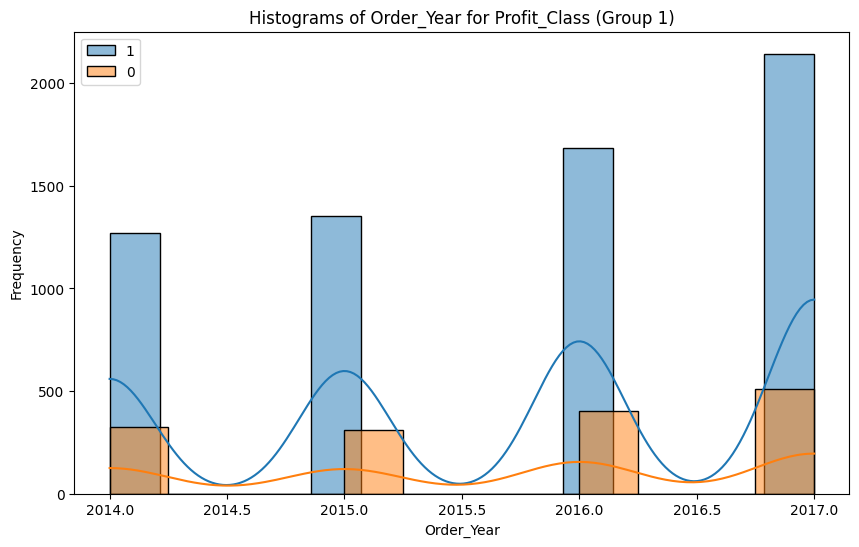

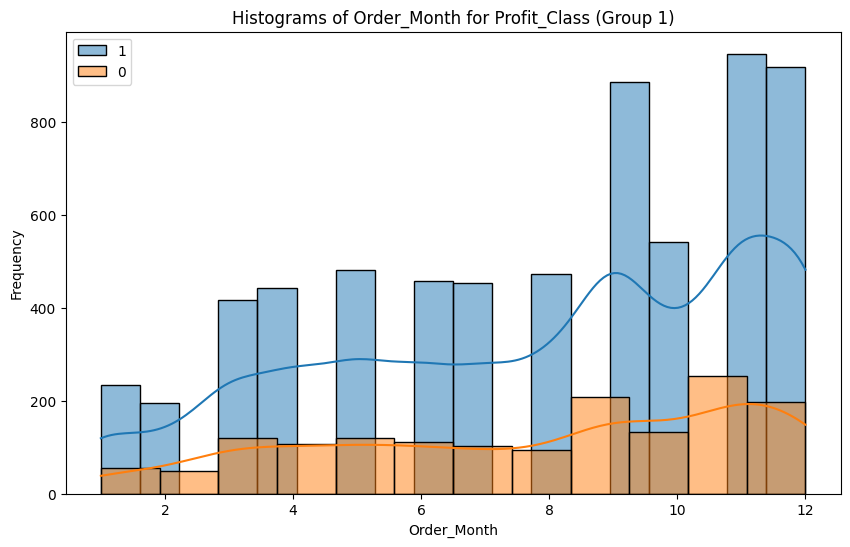

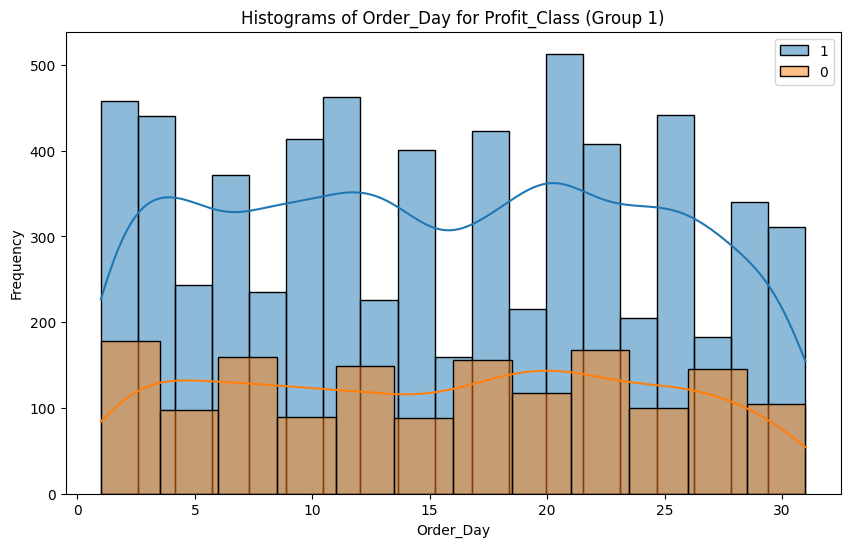

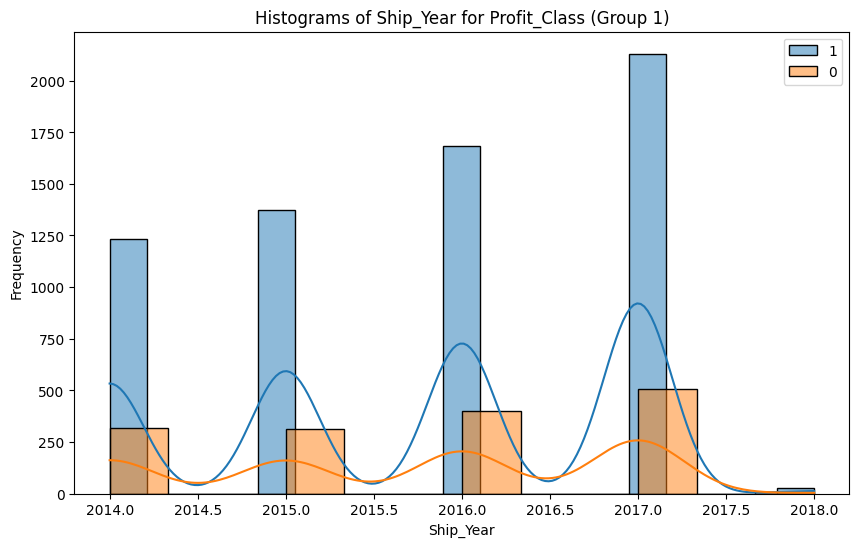

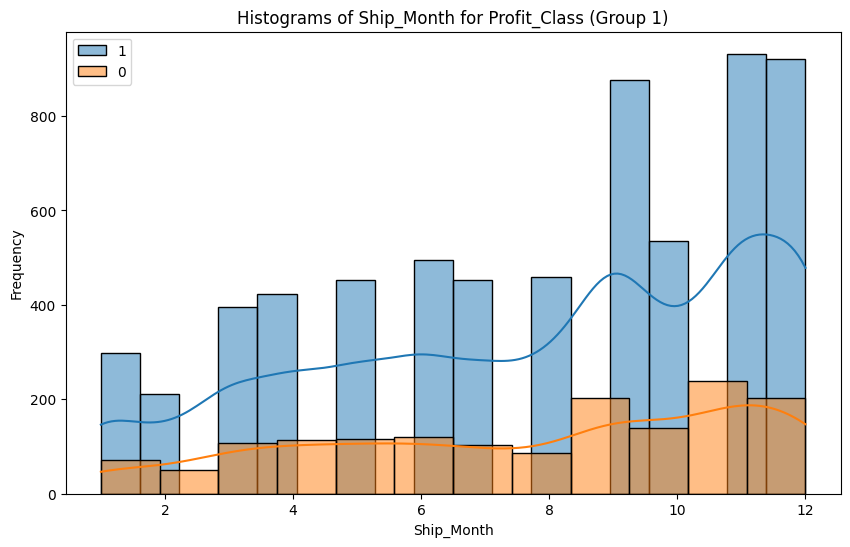

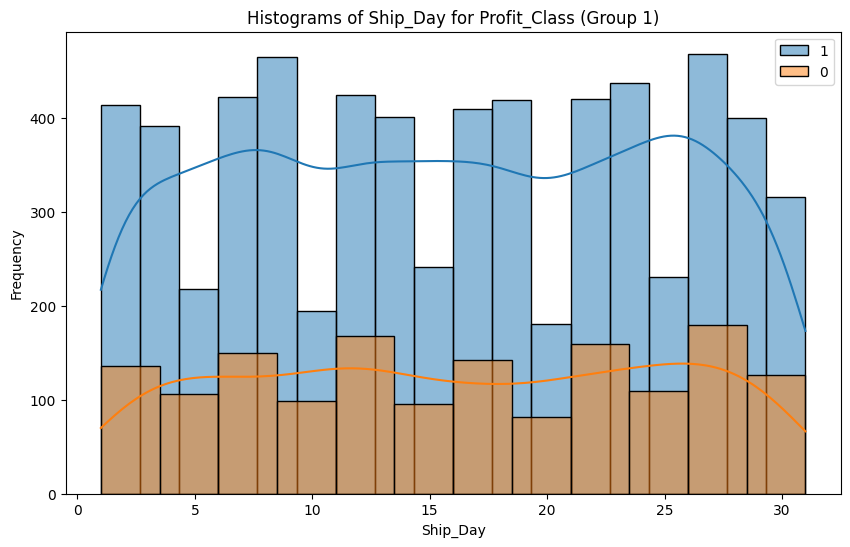

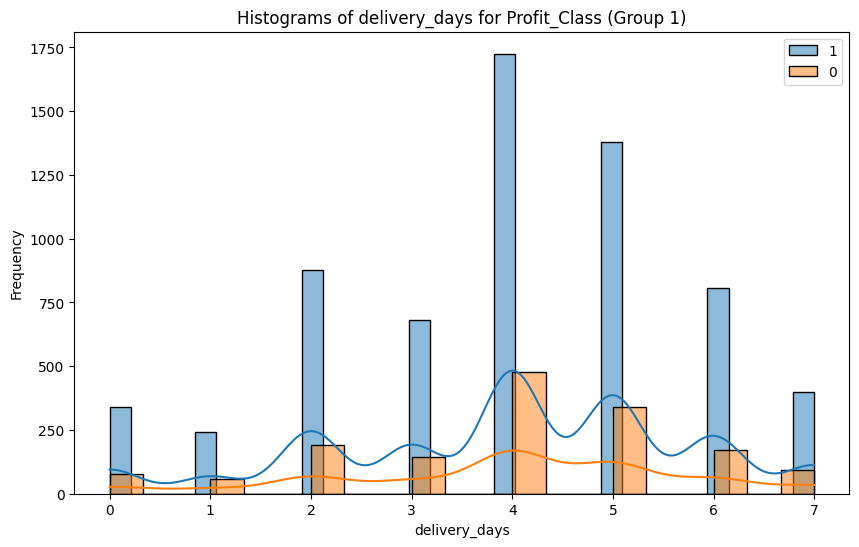

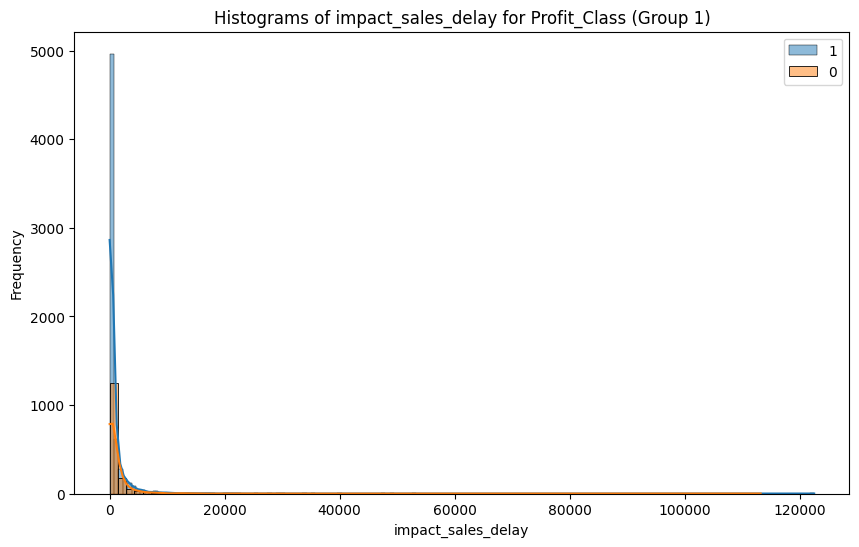

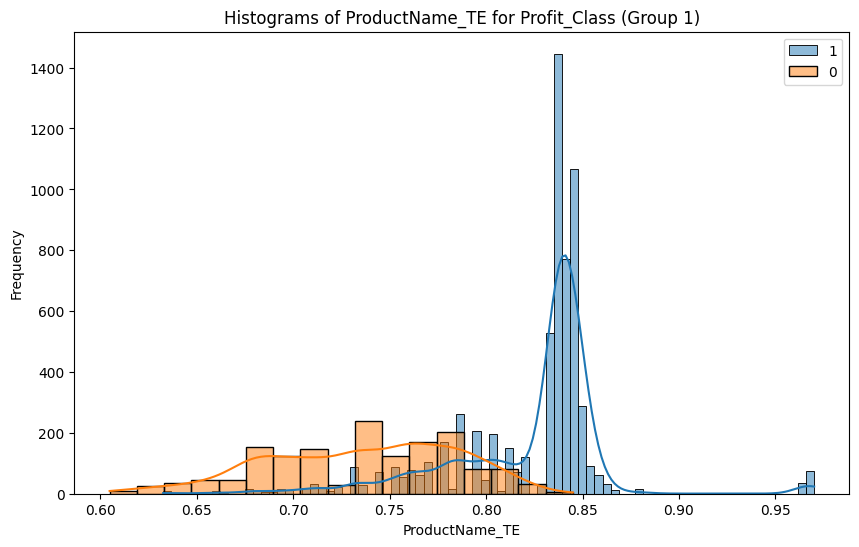

In [55]:
X_train["Profit_Class"] = y_train

for col in features_num:
    bt.plot_grouped_histograms(X_train, cat_col= target, num_col= col, group_size= 2)

##### Correlación

In [56]:
X_train.corr(numeric_only=True)["Profit_Class"].sort_values(ascending=False)

Profit_Class          1.000000
ProductName_TE        0.633464
Ship_Month            0.011009
Order_Month           0.009918
Order_Year            0.007650
Ship_Year             0.007540
Order_Day             0.001322
Quantity             -0.005062
delivery_days        -0.005794
Ship_Day             -0.010168
Sales                -0.022892
impact_sales_delay   -0.024191
Discount             -0.742567
Name: Profit_Class, dtype: float64

<Axes: >

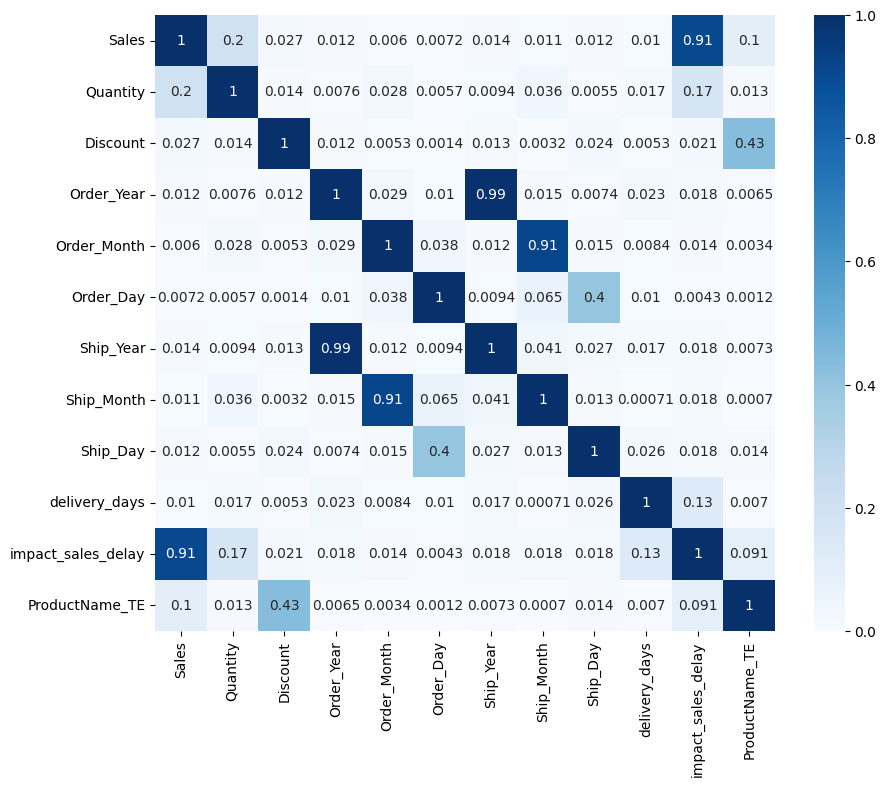

In [57]:
plt.figure(figsize= (10,8))
sns.heatmap(np.abs(X_train[features_num].corr(numeric_only= "True")), annot= True, cmap = "Blues", vmin= 0, vmax= 1)

- Por multicolinealidad con Order es mejor eliminar Ship Year, Ship_Month y Ship_day. 
- Tambien vamos a eliminar Sales porque genera colinealidad con impact_sales_delay.
- Order_day por su baja correlacion con el traget también la vamos a eliminar.

In [58]:
X_train = X_train.drop(columns=["Profit_Class"]) 

In [59]:
features_num_finales = [
  'Quantity',
  'Discount',
  'Order_Year',
  'Order_Month',
  'delivery_days',
  'impact_sales_delay',
  'ProductName_TE'
]

### Procesado de las features categóricas

In [60]:
X_train = pd.get_dummies(X_train, columns=features_cat, dtype=int)
X_test = pd.get_dummies(X_test, columns=features_cat, dtype=int)

# Alinear columnas para que ambos tengan exactamente las mismas
X_train, X_test = X_train.align(X_test, join="left", axis=1, fill_value=0)

### Tratamiento de features

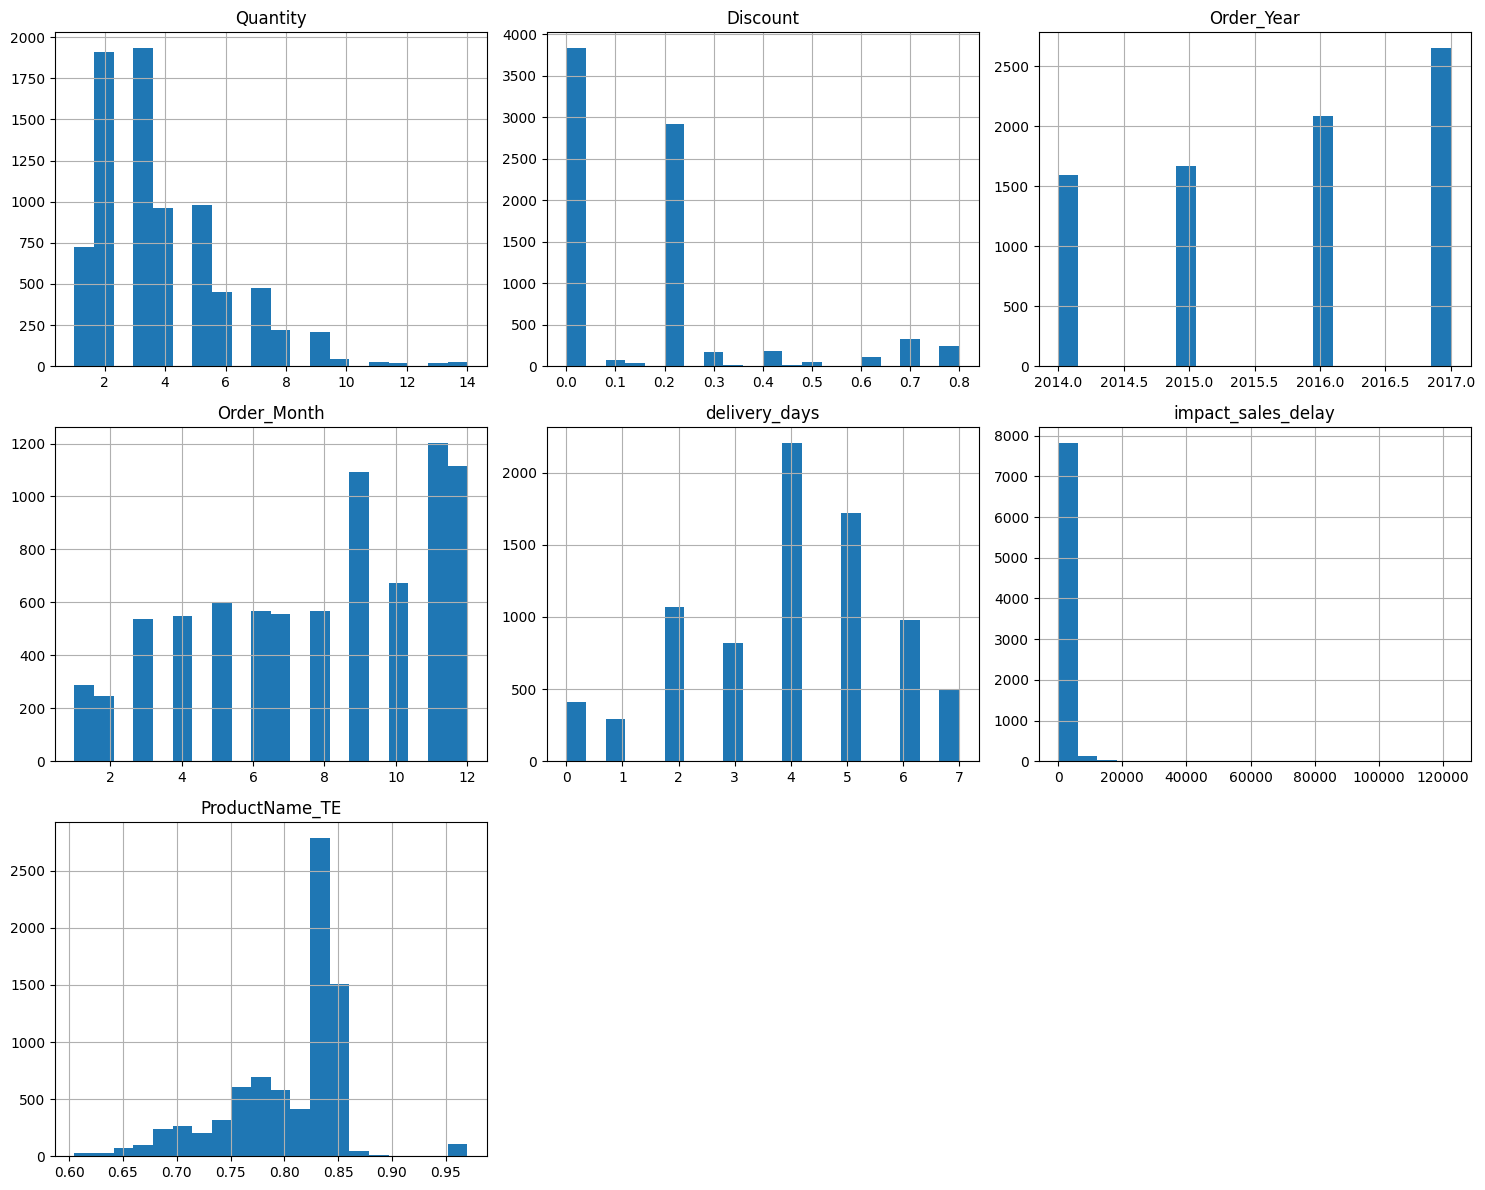

In [61]:
X_train[features_num_finales].hist(bins=20, figsize=(15, 12))
plt.tight_layout()

In [62]:
X_train["impact_sales_delay"] = np.log1p(X_train["impact_sales_delay"])
X_test["impact_sales_delay"] = np.log1p(X_test["impact_sales_delay"])

X_train["ProductName_TE"] = np.log1p(X_train["ProductName_TE"])
X_test["ProductName_TE"] = np.log1p(X_test["ProductName_TE"])


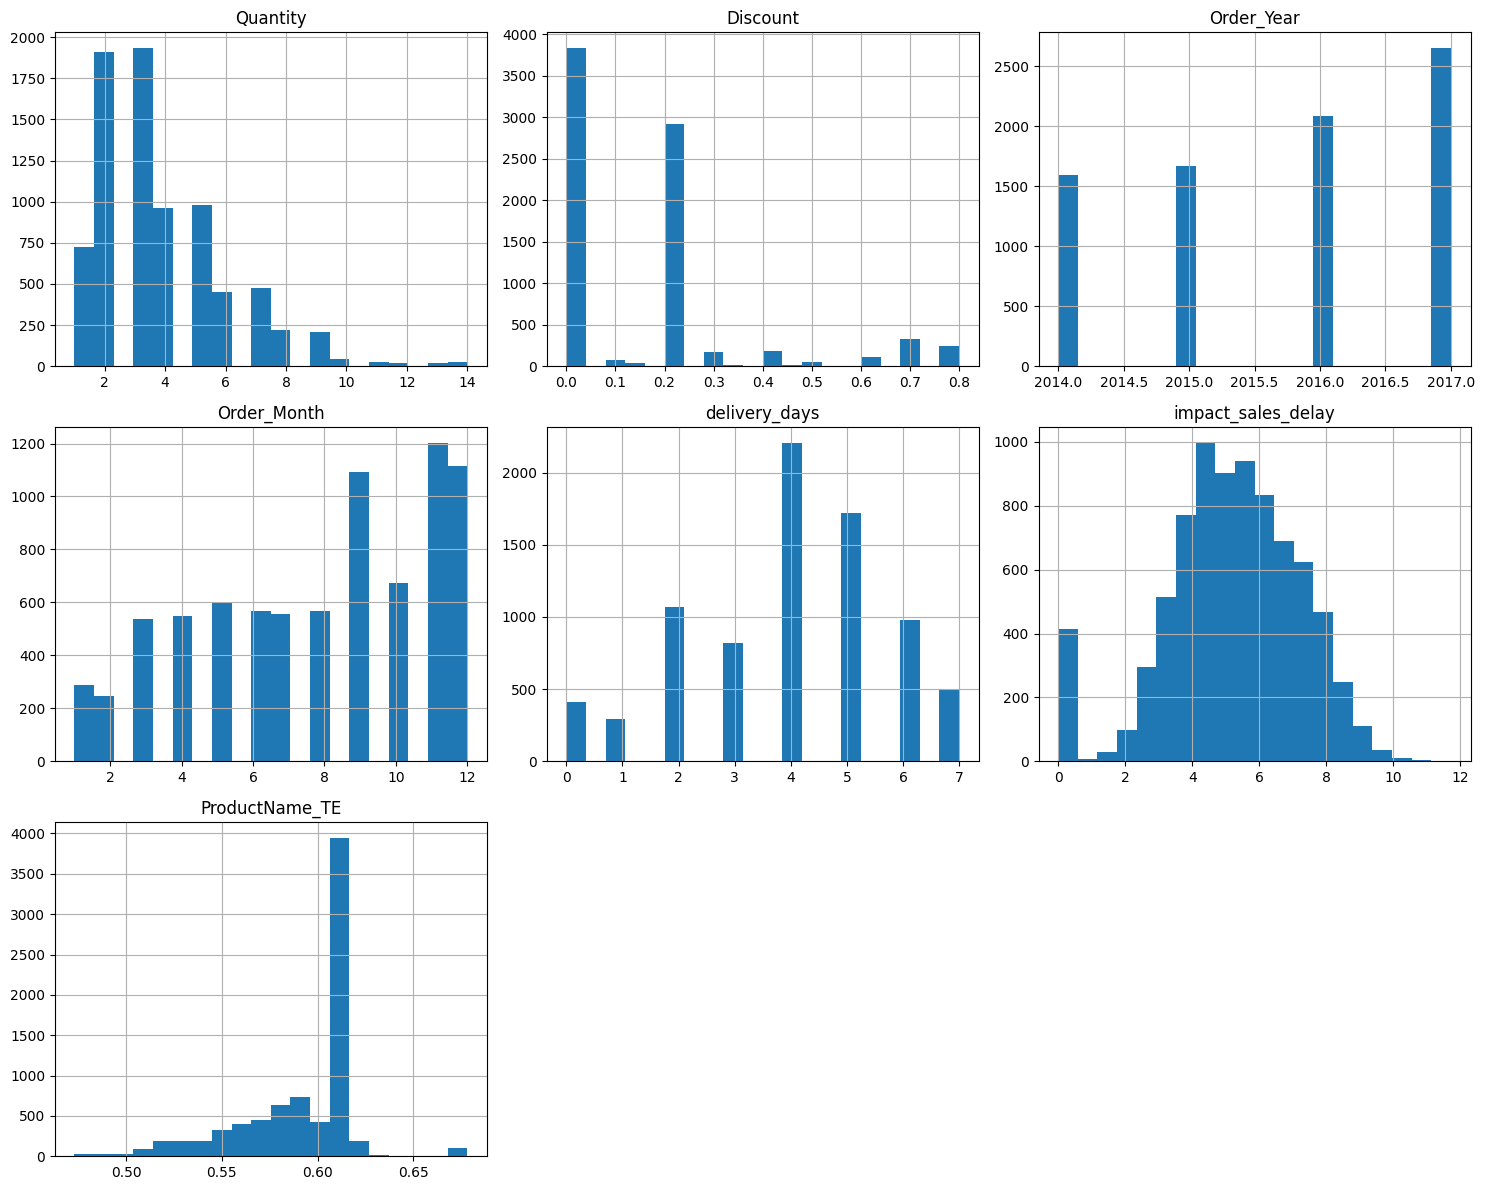

In [63]:
X_train[features_num_finales].hist(bins=20, figsize=(15, 12))
plt.tight_layout()

### Normalización

In [64]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[features_num_finales] = scaler.fit_transform(X_train[features_num_finales])
X_test[features_num_finales] = scaler.transform(X_test[features_num_finales])

In [65]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7995 entries, 2667 to 4099
Data columns (total 92 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Sales                               7995 non-null   float64
 1   Quantity                            7995 non-null   float64
 2   Discount                            7995 non-null   float64
 3   Order_Year                          7995 non-null   float64
 4   Order_Month                         7995 non-null   float64
 5   Order_Day                           7995 non-null   int32  
 6   Ship_Year                           7995 non-null   int32  
 7   Ship_Month                          7995 non-null   int32  
 8   Ship_Day                            7995 non-null   int32  
 9   delivery_days                       7995 non-null   float64
 10  impact_sales_delay                  7995 non-null   float64
 11  ProductName_TE                      7995 non-

In [66]:
X_train = X_train.drop( columns = ["Sales","Ship_Year", "Ship_Month", "Ship_Day", "Order_Day"])
X_test = X_test.drop( columns = ["Sales","Ship_Year", "Ship_Month", "Ship_Day", "Order_Day"])


### Modelado

#### Baseline

##### Logistic Regression baseline

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

lr_base = LogisticRegression(class_weight="balanced" ,max_iter = 1000, random_state = 42)
rf_base = RandomForestClassifier(class_weight="balanced", random_state=42)
gb_base = GradientBoostingClassifier(random_state = 42)

lr_base.fit(X_train, y_train)
rf_base.fit(X_train,y_train)
gb_base.fit(X_train,y_train)

,"loss loss: {'log_loss', 'exponential'}, default='log_loss'The loss function to be optimized. 'log_loss' refers to binomial andmultinomial deviance, the same as used in logistic regression.It is a good choice for classification with probabilistic outputs.For loss 'exponential', gradient boosting recovers the AdaBoost algorithm.",'log_loss'
,"learning_rate learning_rate: float, default=0.1Learning rate shrinks the contribution of each tree by `learning_rate`.There is a trade-off between learning_rate and n_estimators.Values must be in the range `[0.0, inf)`.For an example of the effects of this parameter and its interaction with``subsample``, see:ref:`sphx_glr_auto_examples_ensemble_plot_gradient_boosting_regularization.py`.",0.1
,"n_estimators n_estimators: int, default=100The number of boosting stages to perform. Gradient boostingis fairly robust to over-fitting so a large number usuallyresults in better performance.Values must be in the range `[1, inf)`.",100
,"subsample subsample: float, default=1.0The fraction of samples to be used for fitting the individual baselearners. If smaller than 1.0 this results in Stochastic GradientBoosting. `subsample` interacts with the parameter `n_estimators`.Choosing `subsample < 1.0` leads to a reduction of varianceand an increase in bias.Values must be in the range `(0.0, 1.0]`.",1.0
,"criterion criterion: {'friedman_mse', 'squared_error'}, default='friedman_mse'The function to measure the quality of a split. Supported criteria are'friedman_mse' for the mean squared error with improvement score byFriedman, 'squared_error' for mean squared error. The default value of'friedman_mse' is generally the best as it can provide a betterapproximation in some cases... versionadded:: 0.18",'friedman_mse'
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, values must be in the range `[2, inf)`.- If float, values must be in the range `(0.0, 1.0]` and `min_samples_split` will be `ceil(min_samples_split * n_samples)`... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, values must be in the range `[1, inf)`.- If float, values must be in the range `(0.0, 1.0)` and `min_samples_leaf` will be `ceil(min_samples_leaf * n_samples)`... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.Values must be in the range `[0.0, 0.5]`.",0.0
,"max_depth max_depth: int or None, default=3Maximum depth of the individual regression estimators. The maximumdepth limits the number of nodes in the tree. Tune this parameterfor best performance; the best value depends on the interactionof the input variables. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.If int, values must be in the range `[1, inf)`.",3
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.Values must be in the range `[0.0, inf)`.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, 

2

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score,  classification_report


log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)

# Predicciones
y_pred = log_reg.predict(X_test)

# Métricas
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9744872436218109
F1 Score: 0.9843125192248539

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.90      0.93       387
           1       0.98      0.99      0.98      1612

    accuracy                           0.97      1999
   macro avg       0.97      0.95      0.96      1999
weighted avg       0.97      0.97      0.97      1999



#### Sacar métricas, valorar modelos

2

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, recall_score

# Métrica principal
scorer_recall = make_scorer(recall_score)

# Nombres de modelos
modelos = [
    "Logistic Regression",
    "Decision Tree",
    "Random Forest",
    "LightGBM",
    "XGBoost"
]

# Instancias de modelos

negativos = (y_train == 0).sum()
positivos = (y_train == 1).sum()
scale_pos_weight = negativos / positivos

lista_modelos = [
    LogisticRegression(max_iter=10000, class_weight="balanced"),
    DecisionTreeClassifier(max_depth=5, class_weight="balanced"),
    RandomForestClassifier(max_depth=5, random_state=42, class_weight="balanced"),
    LGBMClassifier(max_depth=5, random_state=42, class_weight="balanced", verbose=-1),
    XGBClassifier(max_depth = 5, random_state = 42, scale_pos_weight =scale_pos_weight )
]



print("Evaluación con Recall (CV=5)\n")

resultados = {}

for nombre, modelo in zip(modelos, lista_modelos):
    print(f"Modelo: {nombre}")

    score = cross_val_score(
        modelo,
        X_train,
        y_train,
        cv=5,
        scoring=scorer_recall
    ).mean()

    resultados[nombre] = score
    print(f"Recall (CV=5): {score:.4f}\n")

Evaluación con Recall (CV=5)

Modelo: Logistic Regression
Recall (CV=5): 0.9826

Modelo: Decision Tree
Recall (CV=5): 0.9632

Modelo: Random Forest
Recall (CV=5): 0.9665

Modelo: LightGBM
Recall (CV=5): 0.9899

Modelo: XGBoost
Recall (CV=5): 0.9893



In [70]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [87]:
models = {
    "Logistic Regression": lr_base,
    "Random Forest": rf_base,
    "Gradient Boosting": gb_base
}

for name, model in models.items():
    print(f"\n{name}")
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))


Logistic Regression
              precision    recall  f1-score   support

           0       0.96      0.90      0.93       387
           1       0.98      0.99      0.98      1612

    accuracy                           0.97      1999
   macro avg       0.97      0.95      0.96      1999
weighted avg       0.97      0.97      0.97      1999


Random Forest
              precision    recall  f1-score   support

           0       0.97      0.90      0.94       387
           1       0.98      0.99      0.99      1612

    accuracy                           0.98      1999
   macro avg       0.98      0.95      0.96      1999
weighted avg       0.98      0.98      0.98      1999


Gradient Boosting
              precision    recall  f1-score   support

           0       0.97      0.86      0.91       387
           1       0.97      0.99      0.98      1612

    accuracy                           0.97      1999
   macro avg       0.97      0.93      0.94      1999
weighted avg       

#### Optimización de hiperparámetros

In [94]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, recall_score
recall_0 = make_scorer(recall_score, pos_label=0)

param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 3],
    "class_weight": ["balanced"]
}

rf_grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring= recall_0,
    n_jobs=-1
)

rf_grid.fit(X_train, y_train)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",RandomForestC...ndom_state=42)
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'class_weight': ['balanced'], 'max_depth': [None, 10, ...], 'min_samples_leaf': [1, 3], 'min_samples_split': [2, 5], ...}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.","make_scorer(r..., pos_label=0)"
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time 

In [95]:
y_pred = rf_grid.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.92      0.91       387
           1       0.98      0.98      0.98      1612

    accuracy                           0.97      1999
   macro avg       0.94      0.95      0.94      1999
weighted avg       0.97      0.97      0.97      1999



2

In [77]:
from sklearn.metrics import make_scorer, recall_score
recall_0 = make_scorer(recall_score, pos_label=0)

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# Calcular scale_pos_weight para XGBoost
negativos = (y_train == 0).sum()
positivos = (y_train == 1).sum()
scale_pos_weight = negativos / positivos

param_grids = {
    "Logistic Regression": {
        "model": LogisticRegression(class_weight="balanced", max_iter=20000),
        "params": {
            "C": [0.01, 0.1, 1, 10],
            "solver": ["lbfgs", "saga"]
        }
    },
    "Decision Tree": {
        "model": DecisionTreeClassifier(class_weight="balanced"),
        "params": {
            "max_depth": [3, 5, 10, 15],
            "min_samples_split": [2, 5, 10]
        }
    },
    "Random Forest": {
        "model": RandomForestClassifier(class_weight="balanced", random_state=42),
        "params": {
            "n_estimators": [100, 200],
            "max_depth": [10, 15, 20],
            "min_samples_split": [2, 5]
        }
    },
    "LightGBM": {
        "model": LGBMClassifier(class_weight="balanced", random_state=42),
        "params": {
            "num_leaves": [31, 63],
            "max_depth": [-1, 10],
            "learning_rate": [0.05, 0.1]
        }
    },
    "XGBoost": {
        "model": XGBClassifier(
            random_state=42,
            scale_pos_weight=scale_pos_weight,
            eval_metric="logloss"
        ),
        "params": {
            "max_depth": [3, 5, 7],
            "learning_rate": [0.05, 0.1, 0.2],
            "n_estimators": [100, 200, 300]
        }
    }
}

In [78]:
from sklearn.model_selection import GridSearchCV

mejores_modelos = {}
resultados_recall = {}

for nombre, contenido in param_grids.items():
    print(f"\n Optimizando: {nombre}")

    grid = GridSearchCV(
        estimator=contenido["model"],
        param_grid=contenido["params"],
        scoring=recall_0,
        cv=5,
        n_jobs=-1
    )

    grid.fit(X_train, y_train)

    mejores_modelos[nombre] = grid.best_estimator_
    resultados_recall[nombre] = grid.best_score_

    print(f"Mejor recall clase 0 (CV=5): {grid.best_score_:.4f}")
    print("Mejores hiperparámetros:", grid.best_params_)


 Optimizando: Logistic Regression
Mejor recall clase 0 (CV=5): 0.9826
Mejores hiperparámetros: {'C': 10, 'solver': 'lbfgs'}

 Optimizando: Decision Tree
Mejor recall clase 0 (CV=5): 0.9845
Mejores hiperparámetros: {'max_depth': 10, 'min_samples_split': 10}

 Optimizando: Random Forest
Mejor recall clase 0 (CV=5): 0.9593
Mejores hiperparámetros: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}

 Optimizando: LightGBM
Mejor recall clase 0 (CV=5): 0.9858
Mejores hiperparámetros: {'learning_rate': 0.05, 'max_depth': 10, 'num_leaves': 31}

 Optimizando: XGBoost
Mejor recall clase 0 (CV=5): 0.9903
Mejores hiperparámetros: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100}


In [79]:
from sklearn.metrics import classification_report

print("\n\n Evaluación final en TEST\n")

for nombre, modelo in mejores_modelos.items():
    print(f"\nModelo: {nombre}")

    y_pred = modelo.predict(X_test)

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))



 Evaluación final en TEST


Modelo: Logistic Regression

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       387
           1       0.99      0.98      0.99      1612

    accuracy                           0.98      1999
   macro avg       0.96      0.96      0.96      1999
weighted avg       0.98      0.98      0.98      1999


Modelo: Decision Tree

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.89      0.91       387
           1       0.97      0.98      0.98      1612

    accuracy                           0.96      1999
   macro avg       0.95      0.94      0.94      1999
weighted avg       0.96      0.96      0.96      1999


Modelo: Random Forest

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.92      0.92       387
           1       0.98      0.98      0.98      1612

    ac